# Gesundheitsausgaben-Analyse

## Projektübersicht

Dieses Projekt analysiert Gesundheitsausgaben basierend auf verschiedenen Kategorien wie Finanzierungsquellen, Arten von Gesundheitsleistungen und Zeiträumen.

Ziel ist es, Einblicke in die Entwicklung der Gesundheitskosten zu gewinnen und Muster zu identifizieren.

### Verwendete Datensätze

- `OGD_gesausgaben01_HVD_HCHF_1.csv` (Daten zu den Gesundheitsausgaben)
- `OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0.csv` (Gesundheitsleistungen und -güter)
- `OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0.csv` (Zeitreihen der Gesundheitsausgaben)
- `OGD_gesausgaben01_HVD_HCHF_1_HEADER.csv` (Metadaten über Spaltenbezeichnungen)

### Projektstruktur

- `notebooks/` → Enthält das Jupyter Notebook
- `data/` → Enthält die Anfangsdaten
- `data/corr/` → Enthält die bereinigten Daten
- `data/prep` → Enthält die vorbereiteten Daten


# 1 Team
- Itmam Alam
- Akos Papp

# 2 Daten

The dataset is about [Laufende Gesundheitsausgaben (HC x HF)](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_gesausgaben01_HVD_HCHF_1) which means current health expenditure.


## 2.2 Daten Laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.pyplot import matshow

In [2]:
dataframes = {}
for filename in os.listdir("data"):
    if not filename.endswith('.csv') and not filename.startswith('OGD_gesausgaben01_HVD_HCHF'): # SCHEISS auf die anderen dateien
        continue
    df_ = pd.read_csv(os.path.join("data", filename), delimiter=';')
    df_name = filename.replace('.csv', '')
    dataframes[df_name] = df_

df_main = dataframes['OGD_gesausgaben01_HVD_HCHF_1']
df_hc = dataframes['OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0']
df_time = dataframes['OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0']
df_header = dataframes['OGD_gesausgaben01_HVD_HCHF_1_HEADER']

## 2.3 Initiale Datenanalyse

##### Warum verwenden wir `;` als Delimiter?

Die CSV-Dateien verwenden das Semikolon (`;`) als Trennzeichen (wir glauben um Verwechslungen mit Dezimalkommas zu vermeiden)

Daher muss beim Einlesen `delimiter=';'` explizit angegeben werden, um die Daten korrekt zu parsen.

Später im Projekt werden wir Beistrich (`'.'`) als Delimiter verwenden, um die Daten zu speichern, da Pandas Kommas benötigt um Zahlen richtig zu parsen.


In [3]:
def analyze_dataframe(df, name):
    """
    Initale standard Analyse eines df
    :param df: DataFrame
    :param name: Name des DataFrames
    """
    print(f"\n--- {name} ---")

    print("\nErste 5 Zeilen:")
    display(df.head())

    print("\nStichprobe:")
    display(df.sample(5))

    print("\nDateninfo:")
    df.info()

    print("\nStatistiken (numerische und kategoriale Werte):")
    display(df.describe())

    # Unique Werte für jede Spalte)
    print("\nAnzahl eindeutiger Werte pro Spalte:")
    for col in df.columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} eindeutige Werte")
        # print(f"  Werte: {df[col].unique()}")  # unnötig zu viel output

    # ganz wichtig noch null werte!
    print(f"Fehlende Werte in {name}:")
    display(df.isnull().sum())

In [4]:
for df_name, df in dataframes.items():
    analyze_dataframe(df, df_name)


--- OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0 ---

Erste 5 Zeilen:


code                                               name   FK  \
0  HC-HC1-HC2  HC.1+HC.2 Leistungen der kurativen und rehabil...  NaN   
1      HC-HC3                                HC.3 Langzeitpflege  NaN   
2      HC-HC4     HC.4 Hilfsleistungen der Gesundheitsversorgung  NaN   
3      HC-HC5                            HC.5 Medizinische Güter  NaN   
4      HC-HC6                                    HC.6 Prävention  NaN   

                                             en_name  de_desc  de_link  \
0         HC.1+HC.2 Curative and rehabilitative care      NaN      NaN   
1                       HC.3 Long-term care (health)      NaN      NaN   
2  HC.4 Ancillary services (non-specified by func...      NaN      NaN   
3     HC.5 Medical goods (non-specified by function)      NaN      NaN   
4                               HC.6 Preventive care      NaN      NaN   

   en_desc  en_link  de_syn  en_syn  
0      NaN      NaN     NaN     NaN  
1      NaN      NaN     NaN     NaN  
2      NaN      NaN     NaN     NaN  
3      NaN      NaN     NaN     NaN  
4      NaN      NaN     NaN     NaN


Stichprobe:


code                                               name  \
37       HC-HC61           HC.6.1 Information, Bildung und Beratung   
39       HC-HC63                     HC.6.3 Früherkennungsprogramme   
9   HC-HC11-HC21  HC.1.1+HC.2.1 Stationäre kurative und rehabili...   
14       HC-HC22  HC.2.2 Tagesfälle der rehabilitativen Gesundhe...   
16       HC-HC13    HC.1.3 Ambulante kurative Gesundheitsversorgung   

            FK                                            en_name  de_desc  \
37      HC-HC6  HC.6.1 Information, education and counseling p...      NaN   
39      HC-HC6          HC.6.3 Early disease detection programmes      NaN   
9   HC-HC1-HC2  HC.1.1+HC.2.1 Inpatient curative and rehabilit...      NaN   
14  HC-HC1-HC2                     HC.2.2 Day rehabilitative care      NaN   
16  HC-HC1-HC2                    HC.1.3 Outpatient curative care      NaN   

    de_link  en_desc  en_link  de_syn  en_syn  
37      NaN      NaN      NaN     NaN     NaN  
39      NaN      NaN      NaN     NaN     NaN  
9       NaN      NaN      NaN     NaN     NaN  
14      NaN      NaN      NaN     NaN     NaN  
16      NaN      NaN      NaN     NaN     NaN


Dateninfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   code     46 non-null     object 
 1   name     46 non-null     object 
 2   FK       39 non-null     object 
 3   en_name  46 non-null     object 
 4   de_desc  0 non-null      float64
 5   de_link  0 non-null      float64
 6   en_desc  0 non-null      float64
 7   en_link  0 non-null      float64
 8   de_syn   0 non-null      float64
 9   en_syn   0 non-null      float64
dtypes: float64(6), object(4)
memory usage: 3.7+ KB

Statistiken (numerische und kategoriale Werte):


de_desc  de_link  en_desc  en_link  de_syn  en_syn
count      0.0      0.0      0.0      0.0     0.0     0.0
mean       NaN      NaN      NaN      NaN     NaN     NaN
std        NaN      NaN      NaN      NaN     NaN     NaN
min        NaN      NaN      NaN      NaN     NaN     NaN
25%        NaN      NaN      NaN      NaN     NaN     NaN
50%        NaN      NaN      NaN      NaN     NaN     NaN
75%        NaN      NaN      NaN      NaN     NaN     NaN
max        NaN      NaN      NaN      NaN     NaN     NaN


Anzahl eindeutiger Werte pro Spalte:
code: 46 eindeutige Werte
name: 45 eindeutige Werte
FK: 7 eindeutige Werte
en_name: 46 eindeutige Werte
de_desc: 0 eindeutige Werte
de_link: 0 eindeutige Werte
en_desc: 0 eindeutige Werte
en_link: 0 eindeutige Werte
de_syn: 0 eindeutige Werte
en_syn: 0 eindeutige Werte
Fehlende Werte in OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0:


code        0
name        0
FK          7
en_name     0
de_desc    46
de_link    46
en_desc    46
en_link    46
de_syn     46
en_syn     46
dtype: int64


--- OGD_gesausgaben01_HVD_HCHF_1 ---

Erste 5 Zeilen:


C-ZEITGES-0   C-HCGES-0      F-HF1    F-HF11    F-HF12   F-HF121 F-HF122  \
0  ZEITGES-2004  HC-HC1-HC2  10808,144  3806,276  7001,868  7001,868   0,000   
1  ZEITGES-2004      HC-HC3   2440,161  2427,924    12,236    12,236   0,000   
2  ZEITGES-2004      HC-HC4    487,615    36,592   451,023   451,023   0,000   
3  ZEITGES-2004      HC-HC5   2604,742     3,820  2600,922  2600,922   0,000   
4  ZEITGES-2004      HC-HC6    378,498   293,059    85,439    85,439   0,000   

     F-HF2   F-HF21   F-HF22  F-HF23     F-HF3    F-HF31   F-HF32  F-HF4  \
0  963,953  821,200  142,753   0,000  2133,249  1965,609  167,640  0,000   
1   39,711    0,000   39,711   0,000   544,594   544,594    0,000  0,000   
2  133,839    0,000  133,839   0,000   110,471   105,254    5,218  0,000   
3   44,169   44,169    0,000   0,000  1673,625  1334,838  338,787  0,000   
4   47,713    0,000    7,916  39,797    79,907    79,907    0,000  0,000   

   F-ALLE_HF  
0  13905,347  
1   3024,465  
2    731,925  
3   4322,536  
4    506,117


Stichprobe:


C-ZEITGES-0     C-HCGES-0     F-HF1   F-HF11    F-HF12   F-HF121  \
161  ZEITGES-2008       HC-HC12   136,051   74,788    61,263    61,263   
124  ZEITGES-2007       HC-HC12   104,982   54,857    50,125    50,125   
125  ZEITGES-2007  HC-HC13-HC23  4721,420  904,273  3817,147  3817,147   
477  ZEITGES-2016       HC-HC52   697,324    0,000   697,324   697,324   
131  ZEITGES-2007       HC-HC23   202,422   65,046   137,376   137,376   

    F-HF122    F-HF2   F-HF21  F-HF22 F-HF23     F-HF3    F-HF31   F-HF32  \
161   0,000    0,000    0,000   0,000  0,000     1,000     1,000    0,000   
124   0,000    0,000    0,000   0,000  0,000     1,000     1,000    0,000   
125   0,000  122,391   98,898  23,493  0,000  1961,633  1802,470  159,163   
477   0,000  124,334  124,334   0,000  0,000   984,952   977,633    7,319   
131   0,000   21,649    0,000  21,649  0,000   230,031   230,031    0,000   

     F-HF4 F-ALLE_HF  
161  0,000   137,051  
124  0,000   105,982  
125  0,000  6805,443  
477  0,000  1806,609  
131  0,000   454,102


Dateninfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   C-ZEITGES-0  729 non-null    object
 1   C-HCGES-0    729 non-null    object
 2   F-HF1        729 non-null    object
 3   F-HF11       729 non-null    object
 4   F-HF12       729 non-null    object
 5   F-HF121      729 non-null    object
 6   F-HF122      729 non-null    object
 7   F-HF2        729 non-null    object
 8   F-HF21       729 non-null    object
 9   F-HF22       729 non-null    object
 10  F-HF23       729 non-null    object
 11  F-HF3        729 non-null    object
 12  F-HF31       729 non-null    object
 13  F-HF32       729 non-null    object
 14  F-HF4        729 non-null    object
 15  F-ALLE_HF    729 non-null    object
dtypes: object(16)
memory usage: 91.3+ KB

Statistiken (numerische und kategoriale Werte):


C-ZEITGES-0   C-HCGES-0  F-HF1 F-HF11 F-HF12 F-HF121 F-HF122  F-HF2  \
count            729         729    729    729    729     729     729    729   
unique            19          43    622    567    513     513       1    491   
top     ZEITGES-2021  HC-HC1-HC2  0,000  0,000  0,000   0,000   0,000  0,000   
freq              43          19     35     86    103     103     729    171   

       F-HF21 F-HF22 F-HF23  F-HF3 F-HF31 F-HF32  F-HF4 F-ALLE_HF  
count     729    729    729    729    729    729    729       729  
unique    380    248     20    534    515    217      1       672  
top     0,000  0,000  0,000  0,000  0,000  0,000  0,000   194,266  
freq      285    401    667    135    154    380    729         2


Anzahl eindeutiger Werte pro Spalte:
C-ZEITGES-0: 19 eindeutige Werte
C-HCGES-0: 43 eindeutige Werte
F-HF1: 622 eindeutige Werte
F-HF11: 567 eindeutige Werte
F-HF12: 513 eindeutige Werte
F-HF121: 513 eindeutige Werte
F-HF122: 1 eindeutige Werte
F-HF2: 491 eindeutige Werte
F-HF21: 380 eindeutige Werte
F-HF22: 248 eindeutige Werte
F-HF23: 20 eindeutige Werte
F-HF3: 534 eindeutige Werte
F-HF31: 515 eindeutige Werte
F-HF32: 217 eindeutige Werte
F-HF4: 1 eindeutige Werte
F-ALLE_HF: 672 eindeutige Werte
Fehlende Werte in OGD_gesausgaben01_HVD_HCHF_1:


C-ZEITGES-0    0
C-HCGES-0      0
F-HF1          0
F-HF11         0
F-HF12         0
F-HF121        0
F-HF122        0
F-HF2          0
F-HF21         0
F-HF22         0
F-HF23         0
F-HF3          0
F-HF31         0
F-HF32         0
F-HF4          0
F-ALLE_HF      0
dtype: int64


--- OGD_gesausgaben01_HVD_HCHF_1_HEADER ---

Erste 5 Zeilen:


code                                               name  \
0  C-ZEITGES-0                                               Zeit   
1    C-HCGES-0                   Gesundheitsleistungen_Güter (HC)   
2        F-HF1  HF.1 Finanzierungssystem Staat und verpflichte...   
3       F-HF11                   HF.1.1 Finanzierungssystem Staat   
4       F-HF12  HF.1.2 Verpflichtende Beitragssysteme: Kranken...   

                                             en_name  Unnamed: 3  Unnamed: 4  \
0                                               Time         NaN         NaN   
1                         Health care functions (HC)         NaN         NaN   
2  HF.1 Government schemes and compulsory contrib...         NaN         NaN   
3                          HF.1.1 Government schemes         NaN         NaN   
4  HF.1.2 Compulsory contributory health insuranc...         NaN         NaN   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN         NaN


Stichprobe:


code                                               name  \
13  F-HF32   HF.3.2 Selbstbehalte (Kostenteilung mit Dritten)   
11   F-HF3        HF.3 Selbstzahlungen der privaten Haushalte   
9   F-HF22  HF.2.2 Finanzierungssystem Private Organisatio...   
12  F-HF31          HF.3.1 Selbstzahlungen ohne Selbstbehalte   
3   F-HF11                   HF.1.1 Finanzierungssystem Staat   

                                        en_name  Unnamed: 3  Unnamed: 4  \
13  HF.3.2 Cost-sharing with third-party payers         NaN         NaN   
11         HF.3 Household out-of-pocket payment         NaN         NaN   
9                HF.2.2 NPISH financing schemes         NaN         NaN   
12  HF.3.1 Out-of-pocket excluding cost-sharing         NaN         NaN   
3                     HF.1.1 Government schemes         NaN         NaN   

    Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
13         NaN         NaN         NaN         NaN         NaN  
11         NaN         NaN         NaN         NaN         NaN  
9          NaN         NaN         NaN         NaN         NaN  
12         NaN         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN         NaN


Dateninfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        16 non-null     object 
 1   name        16 non-null     object 
 2   en_name     16 non-null     object 
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(7), object(3)
memory usage: 1.4+ KB

Statistiken (numerische und kategoriale Werte):


Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
count         0.0         0.0         0.0         0.0         0.0         0.0   
mean          NaN         NaN         NaN         NaN         NaN         NaN   
std           NaN         NaN         NaN         NaN         NaN         NaN   
min           NaN         NaN         NaN         NaN         NaN         NaN   
25%           NaN         NaN         NaN         NaN         NaN         NaN   
50%           NaN         NaN         NaN         NaN         NaN         NaN   
75%           NaN         NaN         NaN         NaN         NaN         NaN   
max           NaN         NaN         NaN         NaN         NaN         NaN   

       Unnamed: 9  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN


Anzahl eindeutiger Werte pro Spalte:
code: 16 eindeutige Werte
name: 16 eindeutige Werte
en_name: 16 eindeutige Werte
Unnamed: 3: 0 eindeutige Werte
Unnamed: 4: 0 eindeutige Werte
Unnamed: 5: 0 eindeutige Werte
Unnamed: 6: 0 eindeutige Werte
Unnamed: 7: 0 eindeutige Werte
Unnamed: 8: 0 eindeutige Werte
Unnamed: 9: 0 eindeutige Werte
Fehlende Werte in OGD_gesausgaben01_HVD_HCHF_1_HEADER:


code           0
name           0
en_name        0
Unnamed: 3    16
Unnamed: 4    16
Unnamed: 5    16
Unnamed: 6    16
Unnamed: 7    16
Unnamed: 8    16
Unnamed: 9    16
dtype: int64


--- OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0 ---

Erste 5 Zeilen:


code  name  Unnamed: 2  en_name  de_desc  de_link  en_desc  \
0  ZEITGES-2004  2004         NaN     2004      NaN      NaN      NaN   
1  ZEITGES-2005  2005         NaN     2005      NaN      NaN      NaN   
2  ZEITGES-2006  2006         NaN     2006      NaN      NaN      NaN   
3  ZEITGES-2007  2007         NaN     2007      NaN      NaN      NaN   
4  ZEITGES-2008  2008         NaN     2008      NaN      NaN      NaN   

   en_link  de_syn  en_syn  
0      NaN     NaN     NaN  
1      NaN     NaN     NaN  
2      NaN     NaN     NaN  
3      NaN     NaN     NaN  
4      NaN     NaN     NaN


Stichprobe:


code  name  Unnamed: 2  en_name  de_desc  de_link  en_desc  \
12  ZEITGES-2016  2016         NaN     2016      NaN      NaN      NaN   
0   ZEITGES-2004  2004         NaN     2004      NaN      NaN      NaN   
13  ZEITGES-2017  2017         NaN     2017      NaN      NaN      NaN   
15  ZEITGES-2019  2019         NaN     2019      NaN      NaN      NaN   
6   ZEITGES-2010  2010         NaN     2010      NaN      NaN      NaN   

    en_link  de_syn  en_syn  
12      NaN     NaN     NaN  
0       NaN     NaN     NaN  
13      NaN     NaN     NaN  
15      NaN     NaN     NaN  
6       NaN     NaN     NaN


Dateninfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        19 non-null     object 
 1   name        19 non-null     int64  
 2   Unnamed: 2  0 non-null      float64
 3   en_name     19 non-null     int64  
 4   de_desc     0 non-null      float64
 5   de_link     0 non-null      float64
 6   en_desc     0 non-null      float64
 7   en_link     0 non-null      float64
 8   de_syn      0 non-null      float64
 9   en_syn      0 non-null      float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.6+ KB

Statistiken (numerische und kategoriale Werte):


name  Unnamed: 2      en_name  de_desc  de_link  en_desc  \
count    19.000000         0.0    19.000000      0.0      0.0      0.0   
mean   2013.000000         NaN  2013.000000      NaN      NaN      NaN   
std       5.627314         NaN     5.627314      NaN      NaN      NaN   
min    2004.000000         NaN  2004.000000      NaN      NaN      NaN   
25%    2008.500000         NaN  2008.500000      NaN      NaN      NaN   
50%    2013.000000         NaN  2013.000000      NaN      NaN      NaN   
75%    2017.500000         NaN  2017.500000      NaN      NaN      NaN   
max    2022.000000         NaN  2022.000000      NaN      NaN      NaN   

       en_link  de_syn  en_syn  
count      0.0     0.0     0.0  
mean       NaN     NaN     NaN  
std        NaN     NaN     NaN  
min        NaN     NaN     NaN  
25%        NaN     NaN     NaN  
50%        NaN     NaN     NaN  
75%        NaN     NaN     NaN  
max        NaN     NaN     NaN


Anzahl eindeutiger Werte pro Spalte:
code: 19 eindeutige Werte
name: 19 eindeutige Werte
Unnamed: 2: 0 eindeutige Werte
en_name: 19 eindeutige Werte
de_desc: 0 eindeutige Werte
de_link: 0 eindeutige Werte
en_desc: 0 eindeutige Werte
en_link: 0 eindeutige Werte
de_syn: 0 eindeutige Werte
en_syn: 0 eindeutige Werte
Fehlende Werte in OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0:


code           0
name           0
Unnamed: 2    19
en_name        0
de_desc       19
de_link       19
en_desc       19
en_link       19
de_syn        19
en_syn        19
dtype: int64

### 2.3 Ergebnisse

##### **2.3.1 Hauptdatensatz (Gesundheitsausgaben)**
- **Anzahl:** 729 Zeilen, 16 Spalten.
- **Datentypen:** Alle Spalten sind vom Typ `object`. Möglicherweise wurden numerische Werte nicht richtig erkannt.
- **Null Werte:** Keine Null Werte.
- **TODO:** Überprüfung der Datenformate (z. B. Zahlen als Text) und Konvertierung in numerische Typen.

---

##### **2.3.2 Gesundheitsleistungen und -güter (HC)**
- **Anzahl:** 46 Zeilen, 10 Spalten.
- **Null Werte:**
  - Spalten `de_desc`, `de_link`, `en_desc`, `en_link`, `de_syn`, `en_syn` enthalten ausschließlich fehlende Werte und sollten entfernt werden.
  - Die Spalte `FK` weist 7 fehlende Werte auf, welche genauer überprüft werden müssen (z. B. Kategorie oder Obergruppe).
- **TODO:**
  - Löschen von Spalten mit ausschließlich fehlenden Werten.
  - Umgang mit fehlenden Werten in `FK` (Ersatz, Gruppierung oder Löschung).

---

##### **2.3.3 Zeitreihen der Gesundheitsausgaben**
- **Anzahl:** 19 Zeilen, 10 Spalten.
- **Null Werte:**
  - Die Spalte `Unnamed: 2` enthält nur `NaN`-Werte und sollte entfernt werden.
  - Weitere Spalten (`de_desc`, `de_link`, etc.) sind auch vollständig leer.
- **Datentypen:**
  - Die Spalten `name` und `en_name` sind als `int64` klassifiziert – sollte überprüft werden, ob dies korrekt ist.
- **TODO:**
  - Entfernen leerer Spalten.
  - Datentypen anpassen, falls erforderlich.

---

##### **2.3.4 Header-Metadaten**
- **Anzahl:** 16 Zeilen, 10 Spalten.
- **Null Werte:**
  - Unbenannte Spalten `Unnamed: 3` bis `Unnamed: 9` enthalten ausschließlich Null Werte und können entfernt werden.
- **TODO:**
  - Entfernen leerer Spalten zur Reduzierung unnötiger Daten.

# 3 Datenbereinigung

## 3.0 Konvertierung der Daten in numerische Werte

Der main Datensatz verwendet `,` anstatt von `.` für die Zahlen und muss umformatiert werden.
Es hat keine null Werte.

- Pandas kann nur in nummern  umwandeln, wenn die Daten korrekt formatiert sind. mit einem shcieß , gehts ned.

In [5]:
# TWO DAYS AND 10 CHIPS PACKETS AND 50 COFFES LATER WE DISCOVERED THAT THE DATA IS NOT NUMERIC AND WE NEED TO REPLACE , WITH . AND CONVERT TO NUMERIC
# DHIS BULLSHIT IS NOT NUMERIC
# df_main.iloc[:, 2:] = df_main.iloc[:, 2:].replace(',', '.', regex=True).apply(pd.to_numeric)
# THIS IS NOT WORKING

# SO WE NEED TO DO IT MANUALLY

# F*ck it, we save the data to csv and read it again

df_main.replace(',', '.', regex=True).to_csv('data/corr/OGD_gesausgaben01_HVD_HCHF_1_corr.csv', index=False)  # replace , with . for numeric conversion
df_main = pd.read_csv('data/corr/OGD_gesausgaben01_HVD_HCHF_1_corr.csv') # read and check if it worked
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   C-ZEITGES-0  729 non-null    object 
 1   C-HCGES-0    729 non-null    object 
 2   F-HF1        729 non-null    float64
 3   F-HF11       729 non-null    float64
 4   F-HF12       729 non-null    float64
 5   F-HF121      729 non-null    float64
 6   F-HF122      729 non-null    float64
 7   F-HF2        729 non-null    float64
 8   F-HF21       729 non-null    float64
 9   F-HF22       729 non-null    float64
 10  F-HF23       729 non-null    float64
 11  F-HF3        729 non-null    float64
 12  F-HF31       729 non-null    float64
 13  F-HF32       729 non-null    float64
 14  F-HF4        729 non-null    float64
 15  F-ALLE_HF    729 non-null    float64
dtypes: float64(14), object(2)
memory usage: 91.3+ KB


## 3.1 Bereinigung der Sprach- und Null-Spalten

- In den Datensätzen sind Spalten in deutscher und english. Da die englischen Spalten redundant sind, werden sie entfernt.
- Zusätzlich werden alle vollständig leeren Spalten aus den Daten gelöscht.


In [6]:
def clean_df(df, name):
    print(f"\n--- Bereinigung für {name} ---\n")

    # 1. Englische Spalten entfernen (beginnen mit 'en_')
    df_cleaned = df.drop(columns=[col for col in df.columns if col.startswith('en_')])

    # 2. Vollständig leerer Spalten
    empty_cols = df_cleaned.columns[df_cleaned.isnull().all()].tolist()
    print(f"Leere Spalten in {name}: {empty_cols}")

    # 3. Entfernen ovn leeren Spalten
    df_cleaned.drop(columns=empty_cols, inplace=True)

    # 4. Speichern der bereinigten DataFrames
    file_name = name + "_corr.csv"
    df_cleaned.to_csv(f'data/corr/{file_name}', index=False)
    print(f"Bereinigte Datei für {name} gespeichert als {file_name}")

del dataframes['OGD_gesausgaben01_HVD_HCHF_1']  # remove main dataframe (already clean)
for name, df in dataframes.items():
    clean_df(df, name)


--- Bereinigung für OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0 ---

Leere Spalten in OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0: ['de_desc', 'de_link', 'de_syn']
Bereinigte Datei für OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0 gespeichert als OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0_corr.csv

--- Bereinigung für OGD_gesausgaben01_HVD_HCHF_1_HEADER ---

Leere Spalten in OGD_gesausgaben01_HVD_HCHF_1_HEADER: ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']
Bereinigte Datei für OGD_gesausgaben01_HVD_HCHF_1_HEADER gespeichert als OGD_gesausgaben01_HVD_HCHF_1_HEADER_corr.csv

--- Bereinigung für OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0 ---

Leere Spalten in OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0: ['Unnamed: 2', 'de_desc', 'de_link', 'de_syn']
Bereinigte Datei für OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0 gespeichert als OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0_corr.csv


## 3.2 Ersetzung von Codes durch Namen

- Die Spalten `C-ZEITGES-0` und `C-HCGES-0` im Hauptdatensatz werden durch verständliche Namen ersetzt. Dies geschieht mit Mapping aus den Metadaten ~~(ahhhhh dafür sind sie da).~~

- Bevor das getan werden kann, mappen wir die Oberkategorien in der HC-GES Datei auf die Unterkategorien, da sie mittels FK mit der Oberkat. verknüpft sind.

- Außerdem werden die Spaltennamen gemappt, da wir das auch erkannt haben.

- Nach der Ersetzung speichern wir die aktualisierten Daten für die weitere Verarbeitung.

- Nach alldem, werden die Metadaten nicht mehr benötigt.


In [7]:
# korrigierte dfs aus dem letzen Schritt laden
df_main_corr = df_main # copy the main dataframe, don't need to read it again
df_hc_corr = pd.read_csv('data/corr/OGD_gesausgaben01_HVD_HCHF_1_C-HCGES-0_corr.csv')
df_time_corr = pd.read_csv('data/corr/OGD_gesausgaben01_HVD_HCHF_1_C-ZEITGES-0_corr.csv')
df_header_corr = pd.read_csv('data/corr/OGD_gesausgaben01_HVD_HCHF_1_HEADER_corr.csv')

In [8]:

# --- 1. Mapping für 'C-HCGES-0' mit df_hc_corr ---
hc_mapping = df_hc_corr.set_index('code')['name'].to_dict()
df_main_corr['C-HCGES-0'] = df_main_corr['C-HCGES-0'].apply(lambda x: hc_mapping.get(x, x))

# --- 2. Mapping für 'C-ZEITGES-0' mit df_time_corr ---
time_mapping = df_time_corr.set_index('code')['name'].to_dict()
df_main_corr['C-ZEITGES-0'] = df_main_corr['C-ZEITGES-0'].apply(lambda x: time_mapping.get(x, x))

# --- 3. Mapping der Spaltennamen mit df_header_corr ---
header_mapping = df_header_corr.set_index('code')['name'].to_dict()
df_main_corr.rename(columns=header_mapping, inplace=True)

df_main_corr.to_csv('data/corr/korr.csv', index=False)

# 4. Datenvorbereitung

## 4.1-2 Numerische Werte
- Enthält alle Spalten mit numerischen Daten (z. B. `int64`, `float64`).
- Diese Daten werden extrahiert und in einer separaten Datei gespeichert.
- **Dateiname:** `num.csv`

In [9]:
# Numerische Werte extrahieren
df_main_corr.info()
df_numeric = df_main_corr.select_dtypes(include=['int64', 'float64'])
df_numeric.to_csv('data/prep/num.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 16 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Zeit                                                                                           729 non-null    int64  
 1   Gesundheitsleistungen_Güter (HC)                                                               729 non-null    object 
 2   HF.1 Finanzierungssystem Staat und verpflichtende Beitragssysteme der Gesundheitsfinanzierung  729 non-null    float64
 3   HF.1.1 Finanzierungssystem Staat                                                               729 non-null    float64
 4   HF.1.2 Verpflichtende Beitragssysteme: Krankenversicherungssysteme                             729 non-null    float64
 5   HF.1.2.1 Finanzierungs


## 4.3-4 Nominale Werte
- Enthält alle kategorialen und textbasierten Daten (z. B. `category`, `object`).
- Diese Werte werden extrahiert und separat gespeichert.
- **Dateiname:** `nom.csv`

In [10]:
# Nominale Werte extrahieren (kategorische und objektbasierte Spalten)
df_nominal = df_main_corr.select_dtypes(include=['category', 'object'])
df_nominal.to_csv('data/prep/nom.csv', index=False)


## 4.5-6 Normalisierte Werte
- Für eine bessere Vergleichbarkeit und Skalierung werden die numerischen Daten normalisiert.
- Die Min-Max-Normalisierung wird verwendet, um die Werte in den Bereich von 0 bis 1 zu bringen.
- **Dateiname:** `norm.csv`


In [11]:
# Normalisierung der numerischen Werte (Min-Max-Normalisierung)
df_normalized = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())
df_normalized.to_csv('data/prep/norm.csv', index=False)

# 5. Visualisierung

## 5.1 Farbpalette
Farbpalletten aus:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://www.practicalpythonfordatascience.com/ap_seaborn_palette

## 5.2 Korrelationen
- **Hohe Korrelation innerhalb ähnlicher Finanzierungsarten:**
  - zb Staatliche und verpflichtende Systeme korrelieren stark (>0,95)

- **Unterschiede zwischen öffentlichen und privaten Systemen:**
  - Private Organisationen und Unternehmen zeigen geringere Korrelation (0,5–0,8) im Vergleich zu staatlichen Systemen

- **Selbstbeteiligungen:**
  - HF.3.1 (Selbstzahlungen ohne Selbsbehalte) hat eine 1.0 Korrelation mit Selbstzahlungen der privaten Haushalte (HF.3)

- **Finazierungssystem Unternehmen:**
  - Korreliert kaum mit anderen Finanzierungsarten (max. 0,59)

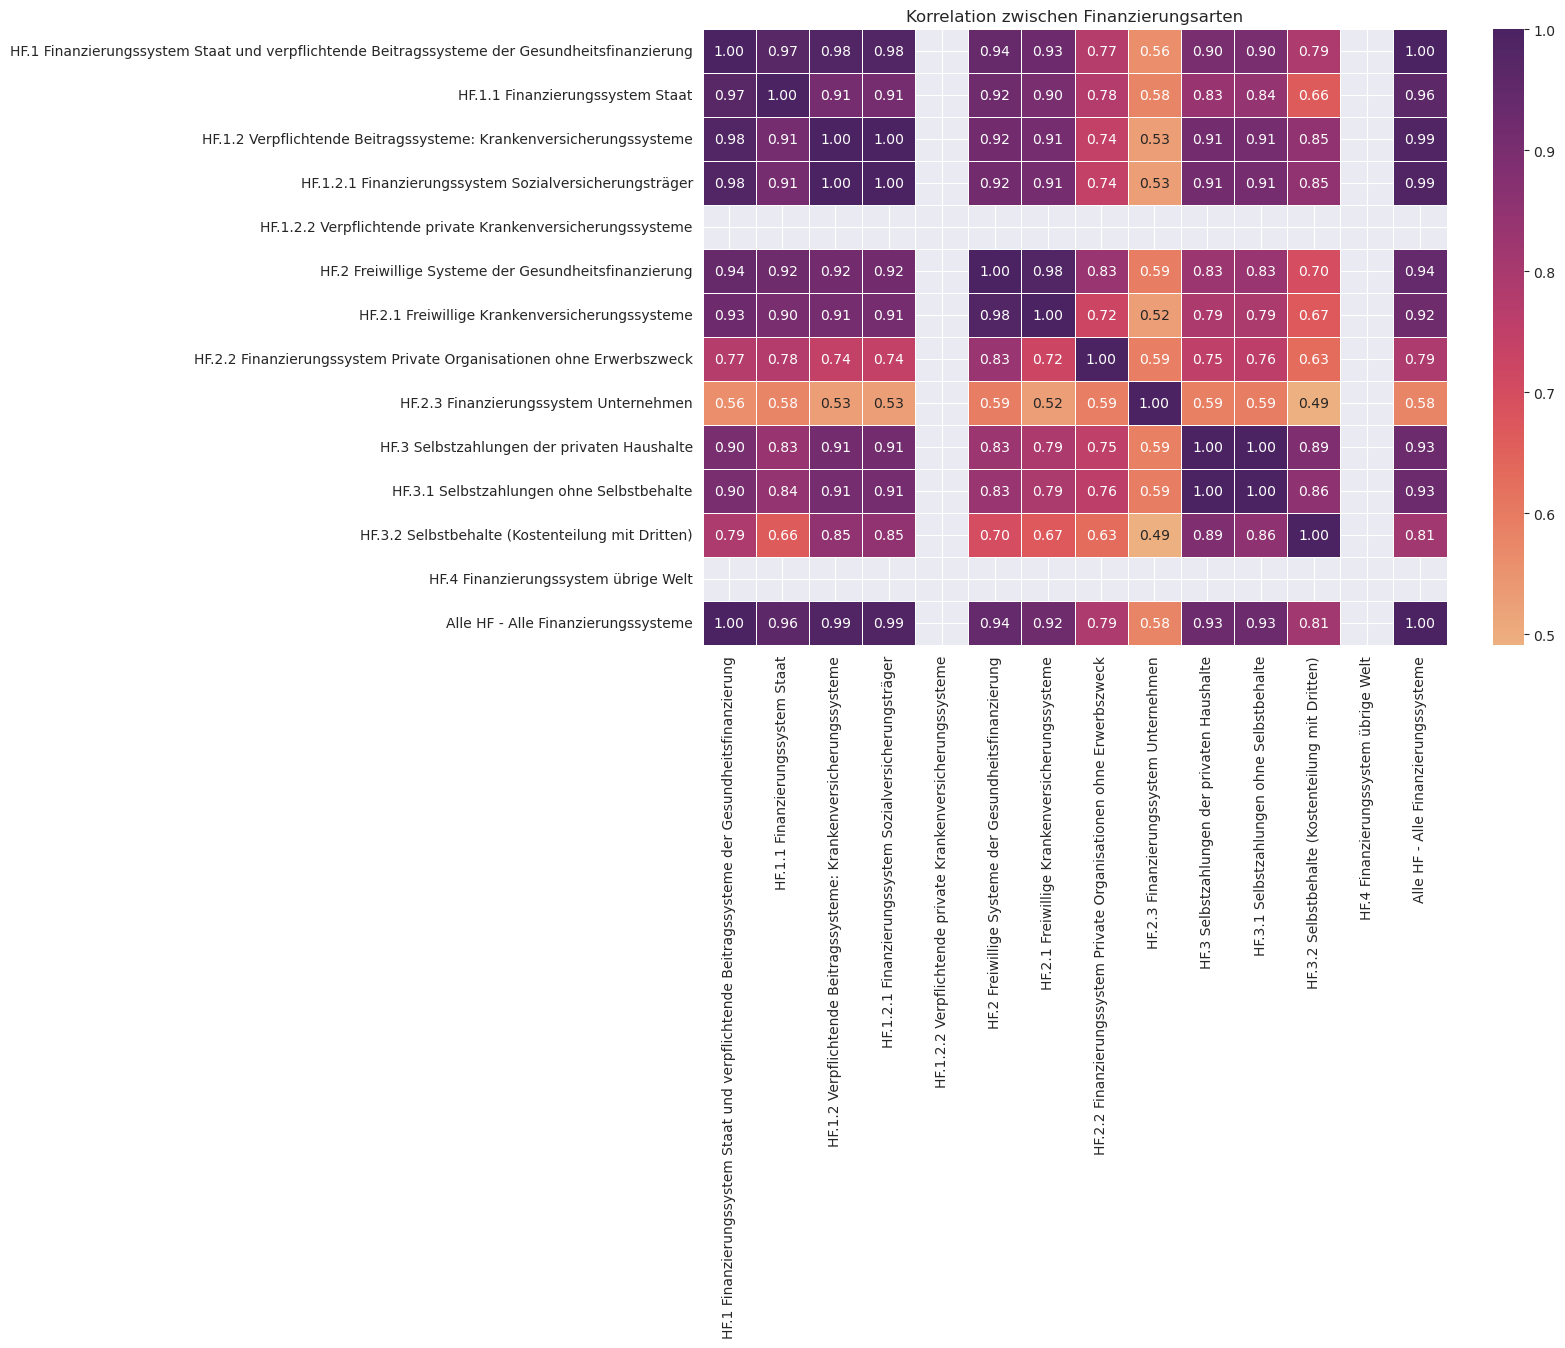

In [12]:
plt.figure(figsize=(12, 8))
corr = df_main_corr.iloc[:, 2:].corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, cmap="flare")
plt.title("Korrelation zwischen Finanzierungsarten")
plt.show()

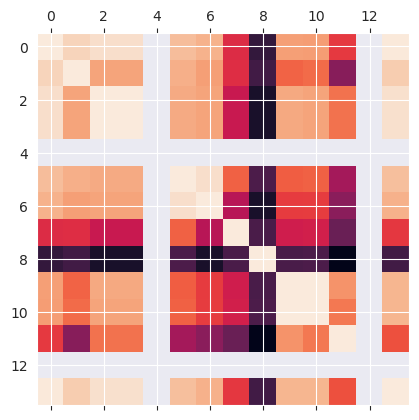

In [13]:
matshow(df_main_corr.iloc[:, 2:].corr())

## 5.3 Pairplot zur Untersuchung der Beziehungen
- **Lineare Zusammenhänge:**
  - Mehrheit der Finanzierungsarten zeigen lineare Beziehungen

- **Nicht-lineare Muster:**
  - „Alle HC – Alle Gesundheitsleistungen“ (pink) zeigt gekrümmte Trends

- **Clusterbildung:**
  - Erkennbare Gruppen in einigen Finanzierungsarten

- **Dichteverteilungen:**
  - Starke Konzentration niedriger Werte mit Ausreißern

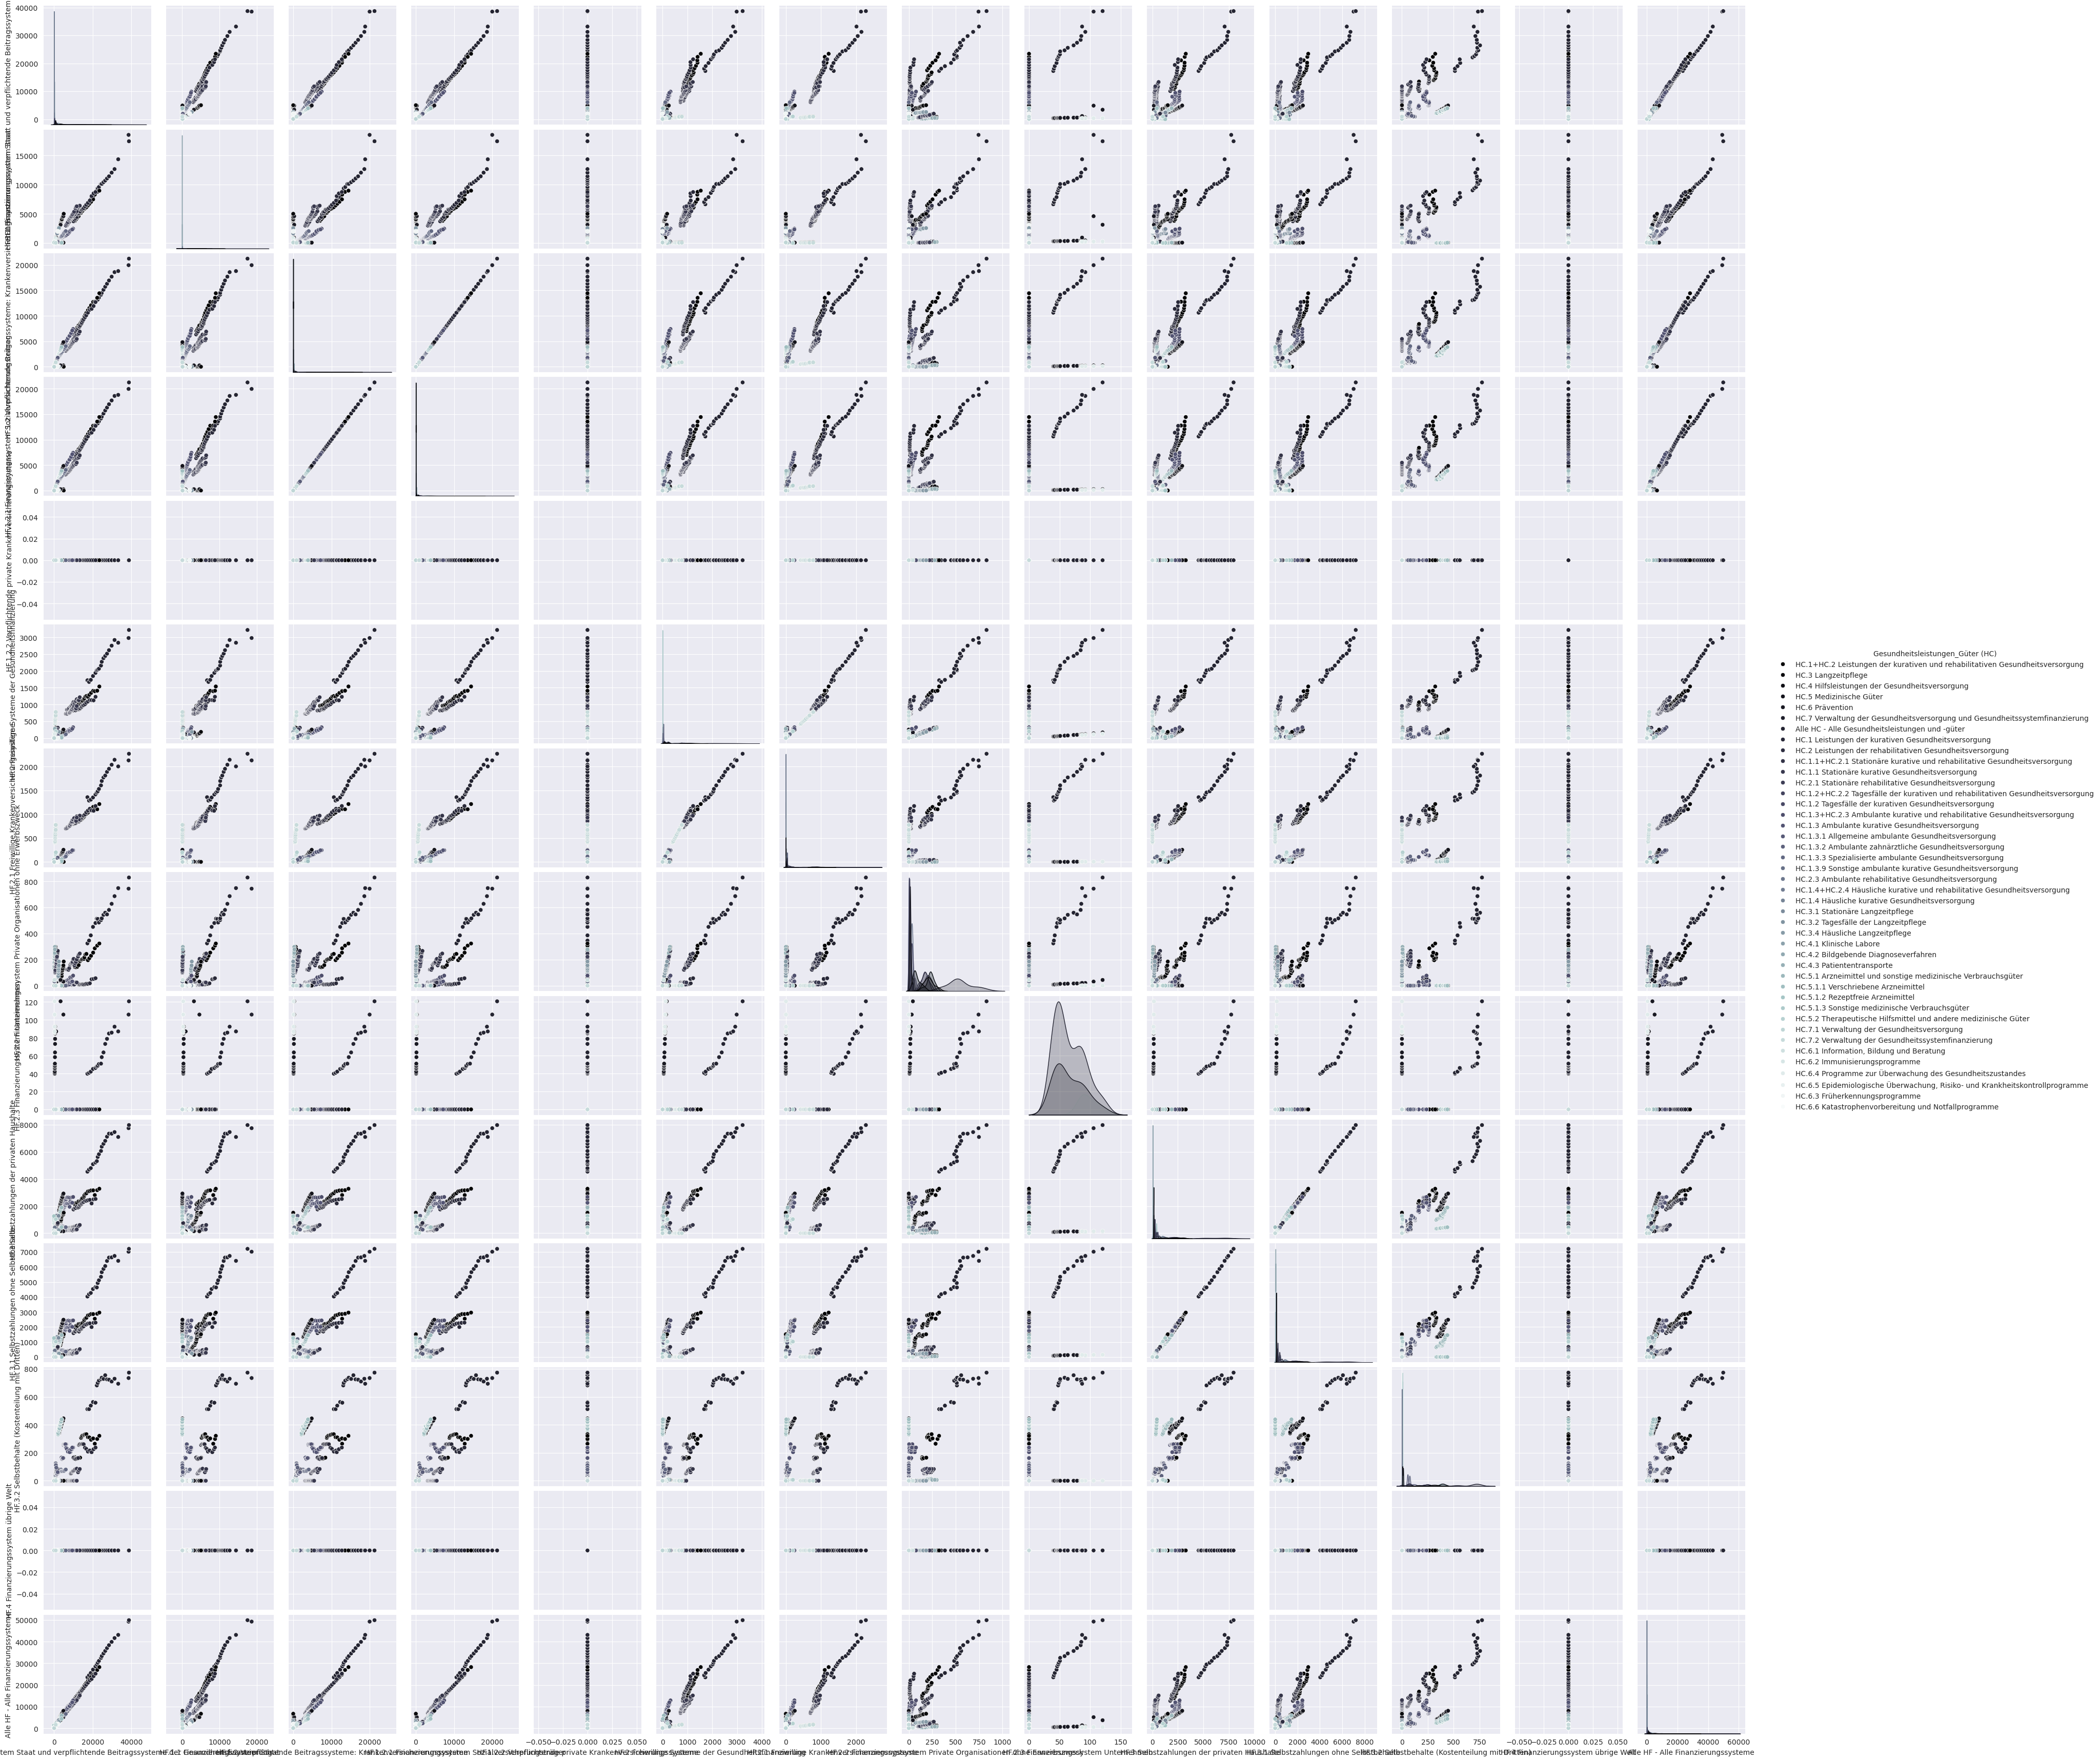

In [14]:
sns.pairplot(df_main_corr.iloc[:, 1:], diag_kind="kde", palette="bone", hue="Gesundheitsleistungen_Güter (HC)")
plt.show()

## 5.4 Box vs Violinplot
- **Ausreißer:**
  - Boxplot zeigt mehr Ausreißer als Violinplot
- **Dichteverteilung:**
  - Violinplot zeigt Verteilungsdichte besser als Boxplot
- **Median und Quartile:**
    - Beide Plots zeigen ähnliche Werte für Median und Quartile
    - Aber man sieht die Whiskers im Boxplot besser


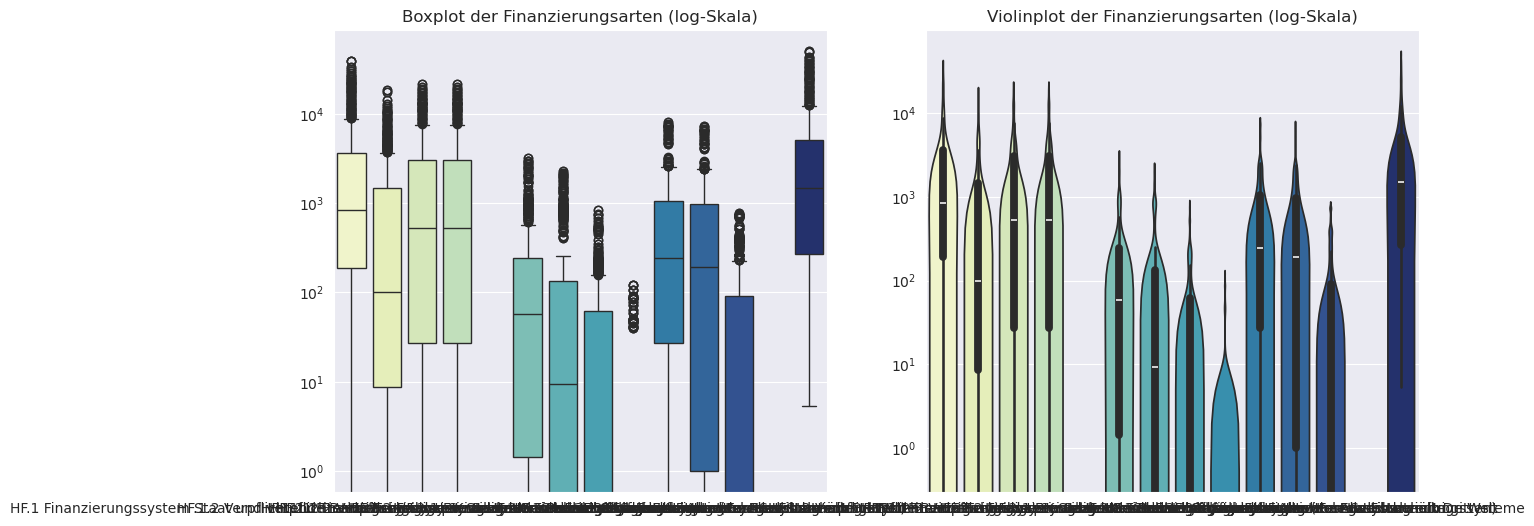

In [15]:
# subplot mit Boxplot und Violinplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# iloc[:, 2:] um nur numerische Werte zu verwenden
sns.boxplot(data=df_main_corr.iloc[:, 2:], ax=axes[0], palette="YlGnBu")
axes[0].set_yscale("log")  # Logarithmische Skalierung weil sonst di Boxen zu klein sind hätte man vllt NORMALISIEREN sollen
axes[0].set_title("Boxplot der Finanzierungsarten (log-Skala)")

sns.violinplot(data=df_main_corr.iloc[:, 2:], ax=axes[1], palette="YlGnBu")
axes[1].set_yscale("log")
axes[1].set_title("Violinplot der Finanzierungsarten (log-Skala)")

plt.show()


## 5.5 Histogramm / KDE-Plot

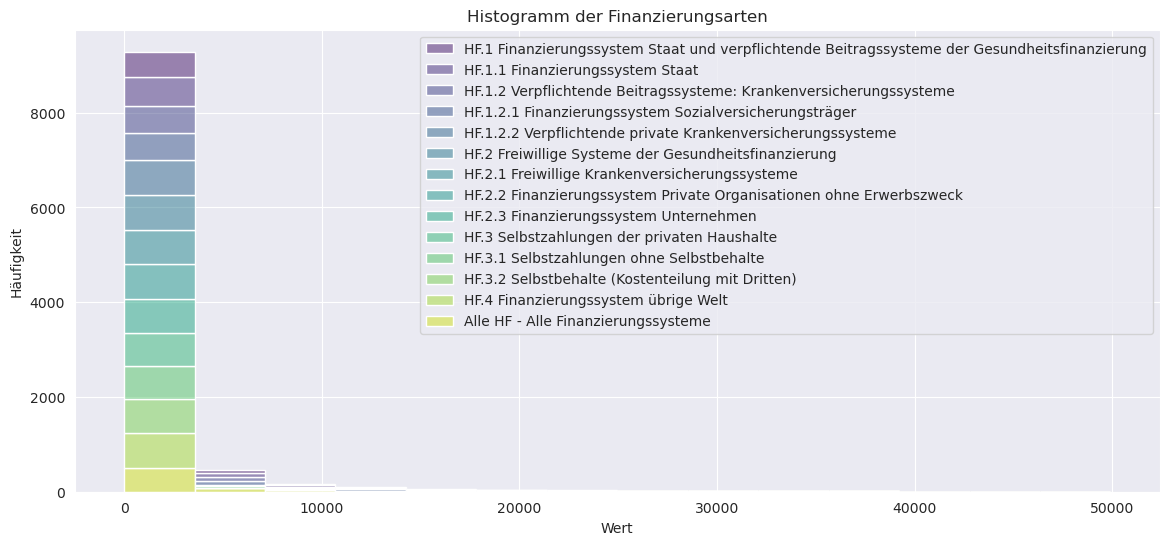

In [16]:
# mit KDE (Kernel Density Estimation) sieht es nicht gut aus,
plt.figure(figsize=(14, 6))
sns.histplot(data=df_main_corr.iloc[:, 2:], bins=14, alpha=0.5, multiple="stack", palette="viridis")
plt.title("Histogramm der Finanzierungsarten")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()

## 5.6 Scatterplot

- **Finanzierungsarten:**
  - Staatliche und verpflichtende Systeme zeigen lineare Korrlationen

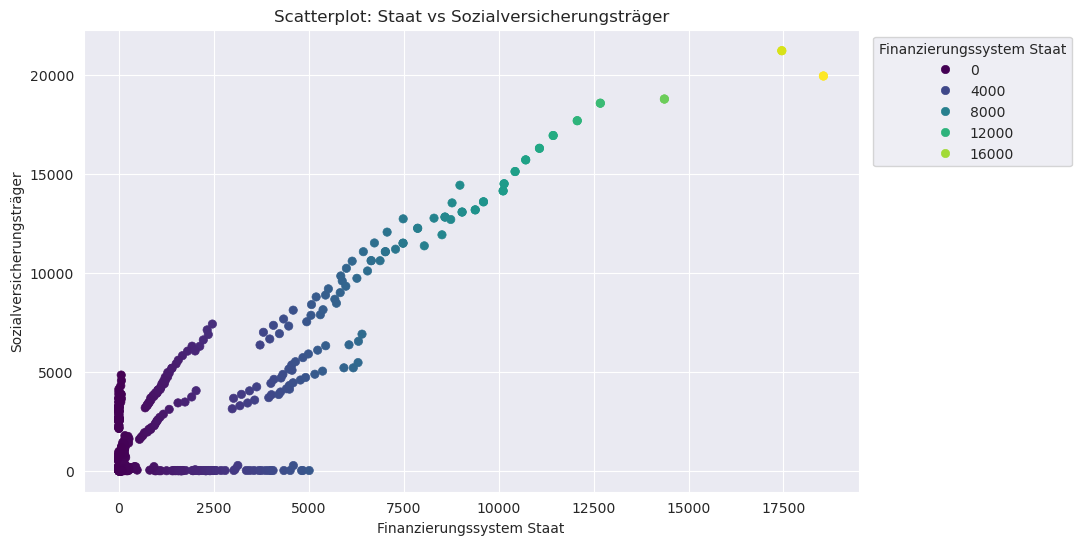

In [17]:
# Scatterplot mit Farbverlauf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_main_corr["HF.1.1 Finanzierungssystem Staat"],
                y=df_main_corr["HF.1.2.1 Finanzierungssystem Sozialversicherungsträger"],
                hue=df_main_corr["HF.1.1 Finanzierungssystem Staat"],  # oder eine andere Spalte für den Farbverlauf
                palette="viridis",
                edgecolor=None) # keine weißen ränder um die Punkte
plt.title("Scatterplot: Staat vs Sozialversicherungsträger")
plt.xlabel("Finanzierungssystem Staat")
plt.ylabel("Sozialversicherungsträger")
plt.legend(title="Finanzierungssystem Staat", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

## 5.7 Linien- und Balkendiagramme

- **"Analyse":**
  - Steigende Tendenz über die Jahre
  - Ruckartigee Anstieg zwischen 2020 und 2021
- **"Balkendiagramm":**
  - Sieht besser aus als Linienplot
  - Nachteil: Meherer Kategorien sind schwer zu vergleichen
- **"Linienplot":**
  - Gute Darstellung von mehreren Werten auf einem Punkt

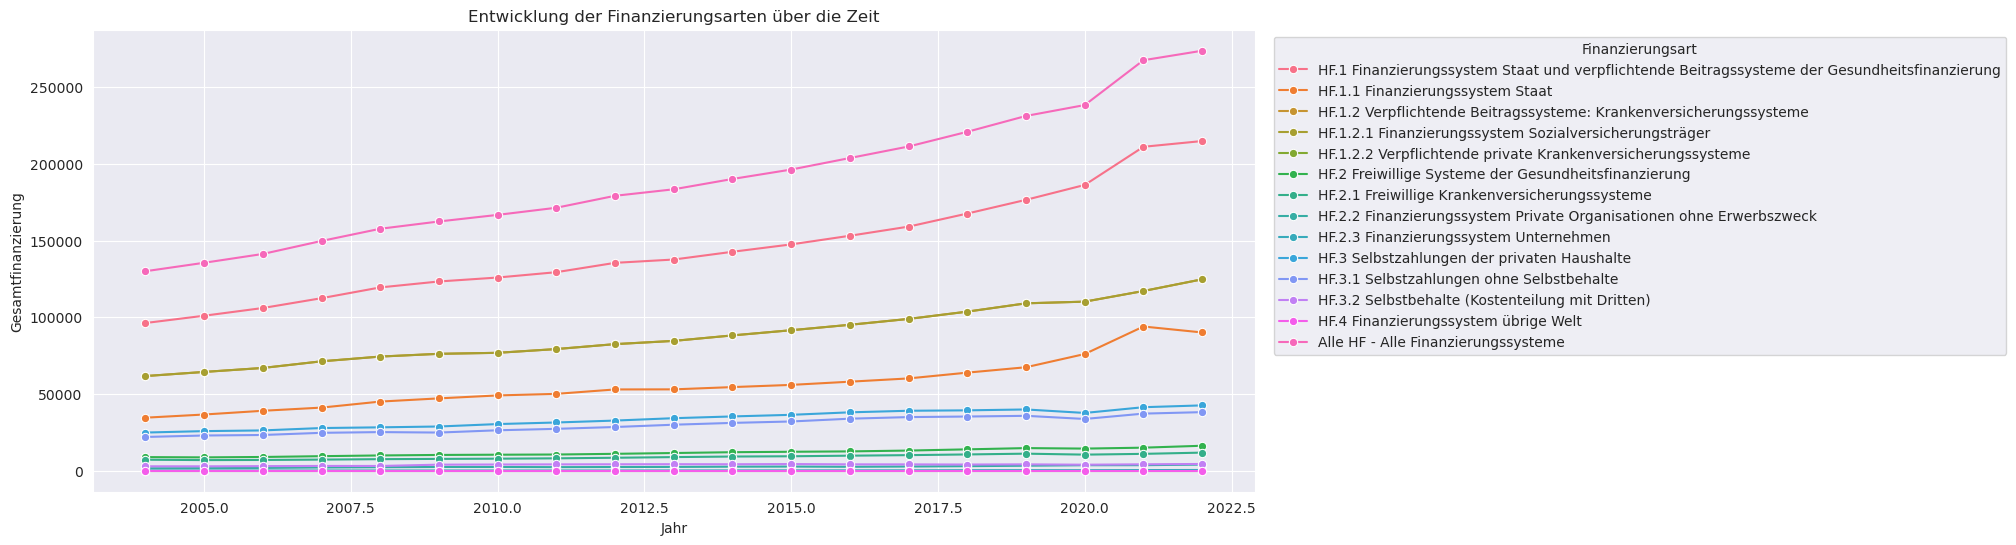

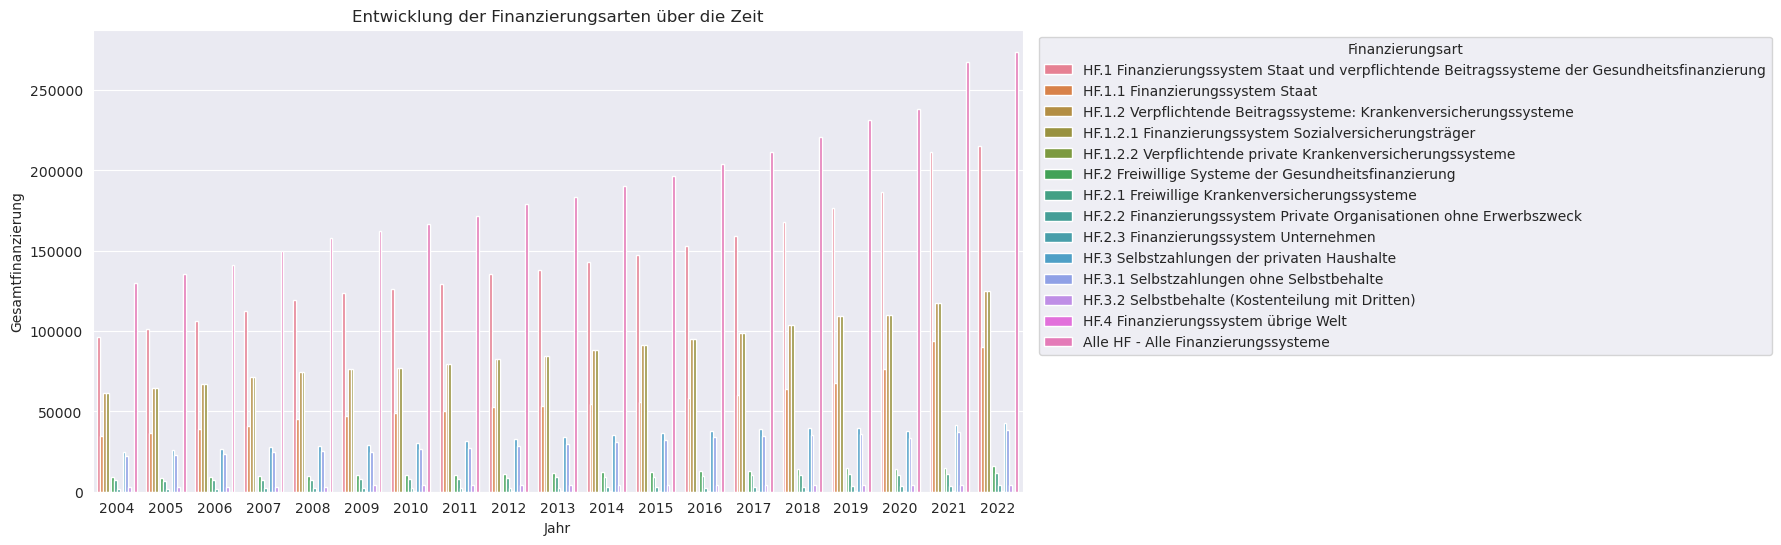

In [18]:
# Daten gruppieren und summieren
df_grouped = df_main_corr.groupby('Zeit').sum().iloc[:, 1:]

# Umwandeln in ein langes Format
df_grouped_melted = df_grouped.reset_index().melt(id_vars=['Zeit'], var_name='Finanzierungsart', value_name='Gesamtfinanzierung')

# Liniendiagramm erstellen
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_grouped_melted, x='Zeit', y='Gesamtfinanzierung', hue='Finanzierungsart', marker='o')
plt.title("Entwicklung der Finanzierungsarten über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Gesamtfinanzierung")
plt.legend(title='Finanzierungsart', bbox_to_anchor=(1.01, 1), loc='best') # endlich mal ein schöner legenden platz
plt.show()

# Umwandeln der Daten in das lange Format
df_grouped_stacked = df_grouped.reset_index().melt(id_vars=['Zeit'], var_name='Finanzierungsart', value_name='Gesamtfinanzierung')

# Gestapeltes Balkendiagramm
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped_stacked, x='Zeit', y='Gesamtfinanzierung', hue='Finanzierungsart')
plt.title("Entwicklung der Finanzierungsarten über die Zeit")
plt.xlabel("Jahr")
plt.ylabel("Gesamtfinanzierung")
plt.legend(title='Finanzierungsart', bbox_to_anchor=(1.01, 1), loc='best')
plt.show()